<a href="https://colab.research.google.com/github/nandhinipriya2206/Personal-Loan-Financial-dataset-using-ML-Models/blob/main/Personal_Loan_Financial_dataset_using_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load Dataset
from google.colab import files
uploaded = files.upload()



Saving personal_loan_financial_dataset.csv to personal_loan_financial_dataset.csv


In [ ]:
df = pd.read_csv("personal_loan_financial_dataset.csv")

In [ ]:
df.isnull().sum()


,0
Age,32
Experience,0
Income,32
Family,0
Education,0
Mortgage,32
CreditCard,0
PersonalLoan,0


In [ ]:
# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid", palette="muted")


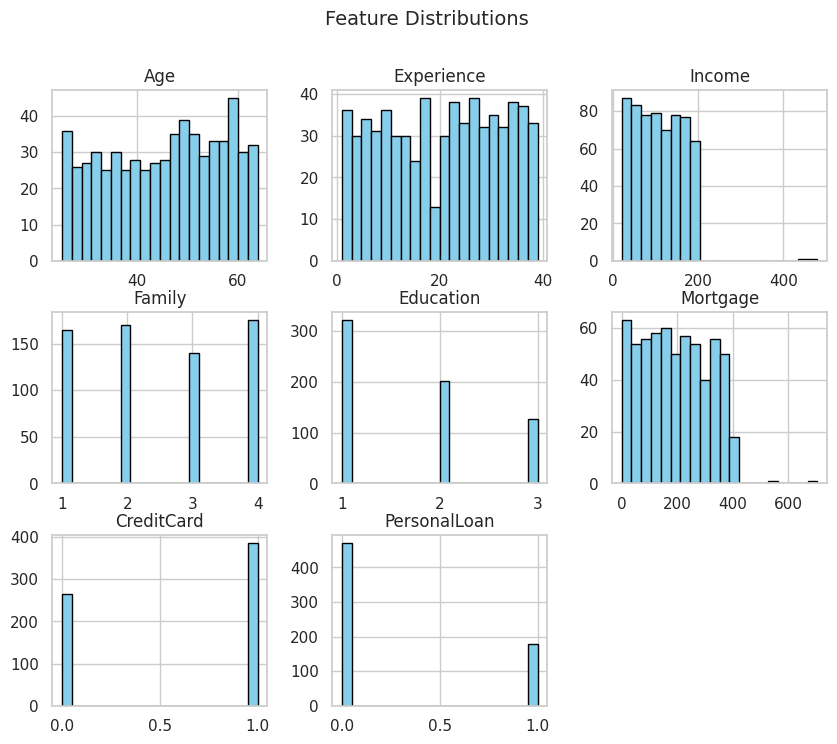

In [ ]:
# Histograms
df.hist(figsize=(10, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


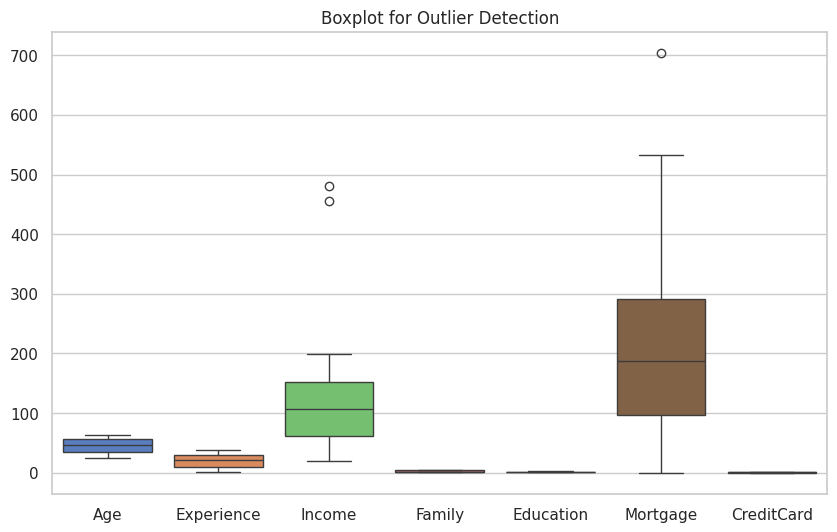

In [ ]:
# Boxplots to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop("PersonalLoan", axis=1))
plt.title("Boxplot for Outlier Detection")
plt.show()


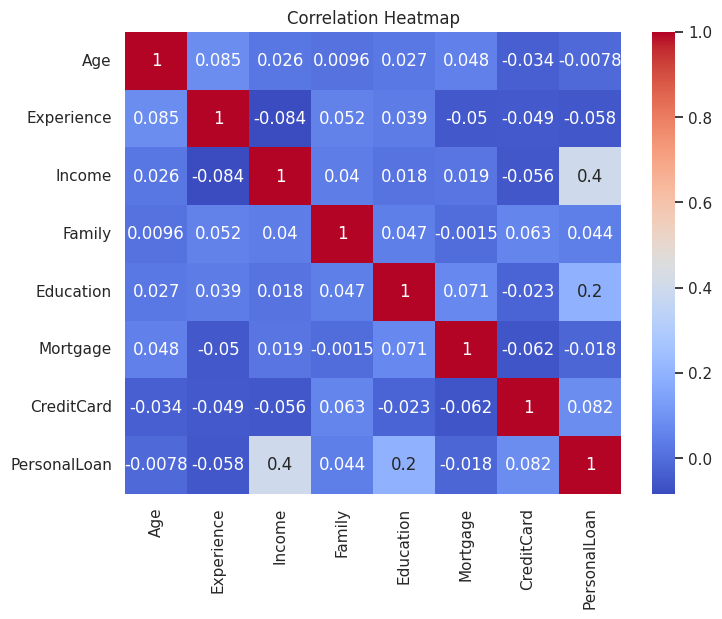

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Handle Missing Values
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
# Handle Missing Values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# IQR Outlier Removal
# Apply only to continuous (numeric) columns — not categorical or target columns
numeric_cols = ["Age", "Experience", "Income", "Mortgage"]

Q1 = df_imputed[numeric_cols].quantile(0.25)
Q3 = df_imputed[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create mask: True for rows within range (no outliers)
mask = ~((df_imputed[numeric_cols] < lower) | (df_imputed[numeric_cols] > upper)).any(axis=1)

# Apply mask to full dataframe (keep non-outlier rows)
df_clean = df_imputed[mask].reset_index(drop=True)

print("Before IQR removal:", df_imputed.shape)
print("After IQR removal:", df_clean.shape)



Before IQR removal: (650, 8)
After IQR removal: (647, 8)


In [ ]:
# Feature Selection & Split Data
X = df_clean.drop("PersonalLoan", axis=1)
y = df_clean["PersonalLoan"]


In [ ]:

# Split data with stratify to maintain balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\n--- KNN Model ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn)*100, 2), "%")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



--- KNN Model ---
Accuracy: 70.37 %
[[101  16]
 [ 32  13]]
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       117
         1.0       0.45      0.29      0.35        45

    accuracy                           0.70       162
   macro avg       0.60      0.58      0.58       162
weighted avg       0.67      0.70      0.68       162



In [ ]:
# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n--- Decision Tree Model ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt)*100, 2), "%")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))



--- Decision Tree Model ---
Accuracy: 72.84 %
[[102  15]
 [ 29  16]]
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       117
         1.0       0.52      0.36      0.42        45

    accuracy                           0.73       162
   macro avg       0.65      0.61      0.62       162
weighted avg       0.71      0.73      0.71       162



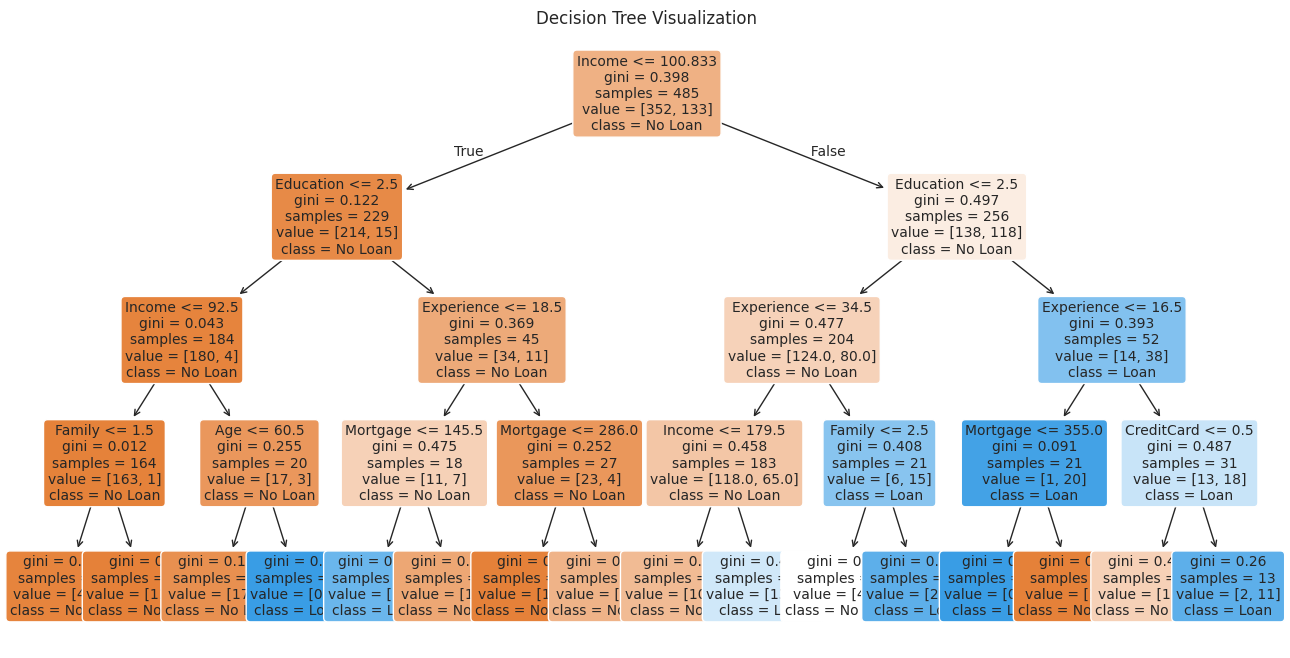

In [ ]:
# Decision Tree Visualization
plt.figure(figsize=(16, 8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Loan", "Loan"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


/tmp/ipython-input-855435596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=importance.index, palette="viridis")


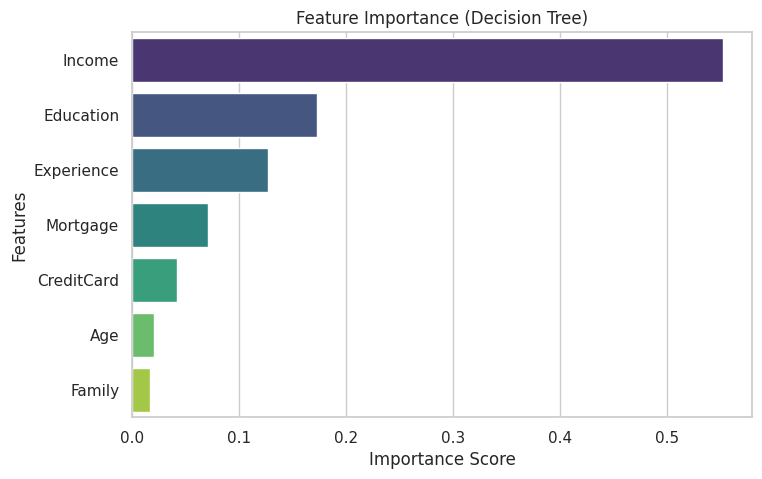

In [ ]:
# Feature Importance

importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=importance.index, palette="viridis")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
# Model Comparison
print("\n📊 Model Comparison:")
print("KNN Accuracy:", round(accuracy_score(y_test, y_pred_knn)*100, 2), "%")
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt)*100, 2), "%")



📊 Model Comparison:
KNN Accuracy: 70.37 %
Decision Tree Accuracy: 72.84 %
